In [2]:
# pip install rdflib

Note: you may need to restart the kernel to use updated packages.


In [22]:
from rdflib import Graph, URIRef, Literal, BNode
from rdflib.namespace import FOAF, RDF,RDFS


In [56]:

g = Graph()
g.bind("RDF", RDF)

In [64]:
involves = URIRef("http://example.org/people/involves")
isTaughtBy = URIRef("http://example.org/people/taught")
bob = URIRef('http://example.org/people/Bob') 
Person = URIRef('http://example.org/people/Person') 
bobi = URIRef('http://example.org/people/bobi') 


In [55]:
involves = URIRef("http://example.org/people/involves")
isTaughtBy = URIRef("http://example.org/people/taught")
bob = URIRef('http://example.org/people/Bob') 


In [ ]:
linda = BNode()  # a GUID is generated

name = Literal("Bob")
age = Literal(24)

In [61]:
g.add((bob, RDFS.subClassOf, Person))

<Graph identifier=N3cba9581c394414285cad8f672575c3e (<class 'rdflib.graph.Graph'>)>

In [65]:
g.add((bobi, RDFS.subClassOf, bob))

<Graph identifier=N3cba9581c394414285cad8f672575c3e (<class 'rdflib.graph.Graph'>)>

In [37]:
isTaughtBy = URIRef("'http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'")

In [57]:
g.add((bob,involves, isTaughtBy))

<Graph identifier=N3cba9581c394414285cad8f672575c3e (<class 'rdflib.graph.Graph'>)>

In [73]:
g.add((involves,RDFS.domain,bob))

<Graph identifier=N3cba9581c394414285cad8f672575c3e (<class 'rdflib.graph.Graph'>)>

In [76]:
g.add((involves,RDFS.range,isTaughtBy))

<Graph identifier=N3cba9581c394414285cad8f672575c3e (<class 'rdflib.graph.Graph'>)>

In [ ]:
g.add((bob,RDF.type, RDFS.Class))

In [86]:
print(g.serialize(format='n3'))

@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ns1: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.org/people/Jake> a foaf:Person ;
    ns1:address "12E Street 98"^^xsd:string ;
    ns1:name "Jake"^^xsd:string ;
    foaf:age 42 .

<http://example.org/people/Jenny> a foaf:Person ;
    ns1:address "Leidseplein 2"^^xsd:string ;
    ns1:name "Jenny"^^xsd:string ;
    foaf:age 12 .

<http://example.org/people/Jill> a foaf:Person ;
    ns1:address "52W Street 5"^^xsd:string ;
    ns1:name "Jill"^^xsd:string ;
    foaf:age 28 .

<http://example.org/people/John> a foaf:Person ;
    ns1:address "Dam 52"^^xsd:string ;
    ns1:name "John"^^xsd:string ;
    foaf:age 32 .

<http://mylocations.org/addresses/12E%20Street%2098> ns1:name "12E Street 98"^^xsd:string .

<http://mylocations.org/addresses/52W%20Street%205> ns1:name "52W Street 5"^^xsd:string .

<http://mylocations.org/addresses/Dam%2052> ns1:name "Dam 52"^^xsd:string .

<http://mylocations.

In [41]:
!pip install pydotplus
!pip install graphviz

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=7b8c8b3bb4e6d2ec197318c794ff9efdb1fb6be8dd8f2031d2ebfb8a64fc1258
  Stored in directory: c:\users\probook\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [42]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot


(dot.exe:24996): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:24996): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



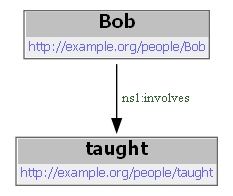

In [59]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))




(dot.exe:22560): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:22560): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:22560): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



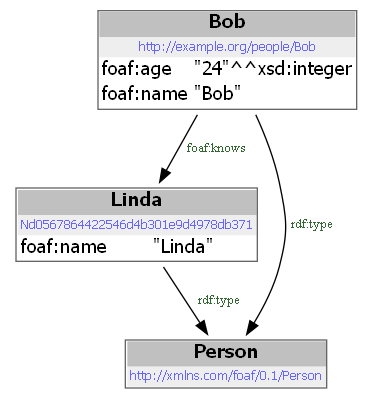

In [90]:
visualize(g)

In [4]:






g.add((bob, FOAF.name, name))
g.add((bob, FOAF.age, age))
g.add((bob, FOAF.knows, linda))
g.add((linda, RDF.type, FOAF.Person))
g.add((linda, FOAF.name, Literal("Linda")))

print(g.serialize())

@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.org/people/Bob> a foaf:Person ;
    foaf:age 24 ;
    foaf:knows [ a foaf:Person ;
            foaf:name "Linda" ] ;
    foaf:name "Bob" .




In [78]:
import pandas as pd #for handling csv and csv contents
from rdflib import Graph, Literal, RDF, URIRef, Namespace #basic RDF handling
from rdflib.namespace import FOAF , XSD #most common namespaces
import urllib.parse #for parsing strings to URI's

In [79]:
url='https://raw.githubusercontent.com/KRontheWeb/csv2rdf-tutorial/master/example.csv'
df=pd.read_csv(url,sep=";",quotechar='"')
# df # uncomment to check for contents

In [80]:
g = Graph()
ppl = Namespace('http://example.org/people/')
loc = Namespace('http://mylocations.org/addresses/')
schema = Namespace('http://schema.org/')

In [81]:
for index, row in df.iterrows():
    g.add((URIRef(ppl+row['Name']), RDF.type, FOAF.Person))
    g.add((URIRef(ppl+row['Name']), URIRef(schema+'name'), Literal(row['Name'], datatype=XSD.string) ))
    g.add((URIRef(ppl+row['Name']), FOAF.age, Literal(row['Age'], datatype=XSD.integer) ))
    g.add((URIRef(ppl+row['Name']), URIRef(schema+'address'), Literal(row['Address'], datatype=XSD.string) ))
    g.add((URIRef(loc+urllib.parse.quote(row['Address'])), URIRef(schema+'name'), Literal(row['Address'], datatype=XSD.string) ))

In [85]:
print(g.serialize(format='turtle'))

@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ns1: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.org/people/Jake> a foaf:Person ;
    ns1:address "12E Street 98"^^xsd:string ;
    ns1:name "Jake"^^xsd:string ;
    foaf:age 42 .

<http://example.org/people/Jenny> a foaf:Person ;
    ns1:address "Leidseplein 2"^^xsd:string ;
    ns1:name "Jenny"^^xsd:string ;
    foaf:age 12 .

<http://example.org/people/Jill> a foaf:Person ;
    ns1:address "52W Street 5"^^xsd:string ;
    ns1:name "Jill"^^xsd:string ;
    foaf:age 28 .

<http://example.org/people/John> a foaf:Person ;
    ns1:address "Dam 52"^^xsd:string ;
    ns1:name "John"^^xsd:string ;
    foaf:age 32 .

<http://mylocations.org/addresses/12E%20Street%2098> ns1:name "12E Street 98"^^xsd:string .

<http://mylocations.org/addresses/52W%20Street%205> ns1:name "52W Street 5"^^xsd:string .

<http://mylocations.org/addresses/Dam%2052> ns1:name "Dam 52"^^xsd:string .

<http://mylocations.

In [169]:
# Save the results to disk
g.serialize('tbox2.rdf',format='turtle')

<Graph identifier=N24e1e13f976c4576a02b44c72ecb62d0 (<class 'rdflib.graph.Graph'>)>

In [94]:
Person = URIRef('http://example.org/people/Person') 
name = URIRef('http://example.org/people/Name') 
Address = URIRef('http://example.org/people/Address') 
Country = URIRef('http://example.org/people/Country') 
Age = URIRef('http://example.org/people/Age') 




In [96]:
has = URIRef('http://example.org/people/has') 
lives_in = URIRef('http://example.org/people/lives') 


In [166]:
g = Graph()
g.bind("RDF", RDF)

In [161]:
# g.add((Person,RDF.type, RDFS.Class))
#g.add((name,RDF.type, RDFS.Class))
#g.add((Address,RDF.type, RDFS.Class))
#g.add((Country,RDF.type, RDFS.Class))
#g.add((Age,RDF.type, RDFS.Class))
#g.add((has,RDF.type, RDF.Property))
g.add((lives_in,RDF.type, RDF.Property))
# g.add((lives_in,RDFS.domain,Person))
# g.add((lives_in,RDFS.range,Country))

<Graph identifier=N628d60daba4549928eedaf24120690a4 (<class 'rdflib.graph.Graph'>)>


(dot.exe:10324): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:10324): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



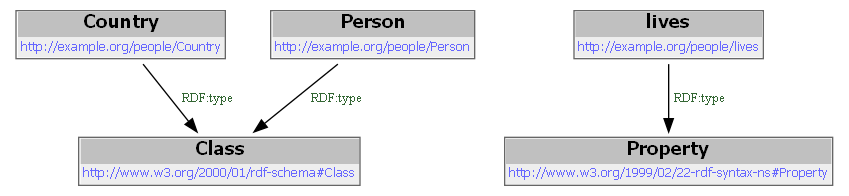

In [162]:
visualize(g)

In [167]:
# g.add((Person,has, name))
# g.add((Person,has, Address))
g.add((Person,lives_in, Country))
# # g.add((Person,has, age))

<Graph identifier=N24e1e13f976c4576a02b44c72ecb62d0 (<class 'rdflib.graph.Graph'>)>


(dot.exe:6024): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:6024): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



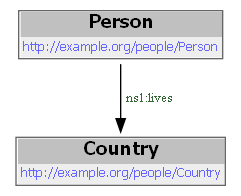

In [168]:
visualize(g)

In [ ]:
"Name";"Address";"Place";"Country";"Age";"Hobby";"Favourite Colour" 
"John";"Dam 52";"Amsterdam";"The Netherlands";"32";"Fishing";"Blue"
"Jenny";"Leidseplein 2";"Amsterdam";"The Netherlands";"12";"Dancing";"Mauve"
"Jill";"52W Street 5";"Amsterdam";"United States of America";"28";"Carpentry";"Cyan"
"Jake";"12E Street 98";"Amsterdam";"United States of America";"42";"Ballet";"Purple"

In [104]:
url='https://raw.githubusercontent.com/KRontheWeb/csv2rdf-tutorial/master/example.csv'
df=pd.read_csv(url,sep=";",quotechar='"')
# df # uncomment to check for contents

In [151]:
for index, row in df.iterrows():
    g.add((URIRef('http://example.org/people/Person'+row['Name']),RDF.type,Person) )
    g.add((URIRef('http://example.org/people/Country'+row['Country'].replace(" ", "_")),RDF.type,Country) )
    g.add((URIRef('http://example.org/people/Person'+row['Name']),lives_in,URIRef('http://example.org/people/Country'+row['Country'].replace(" ", "_")))) 
    
    


(dot.exe:25124): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:25124): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



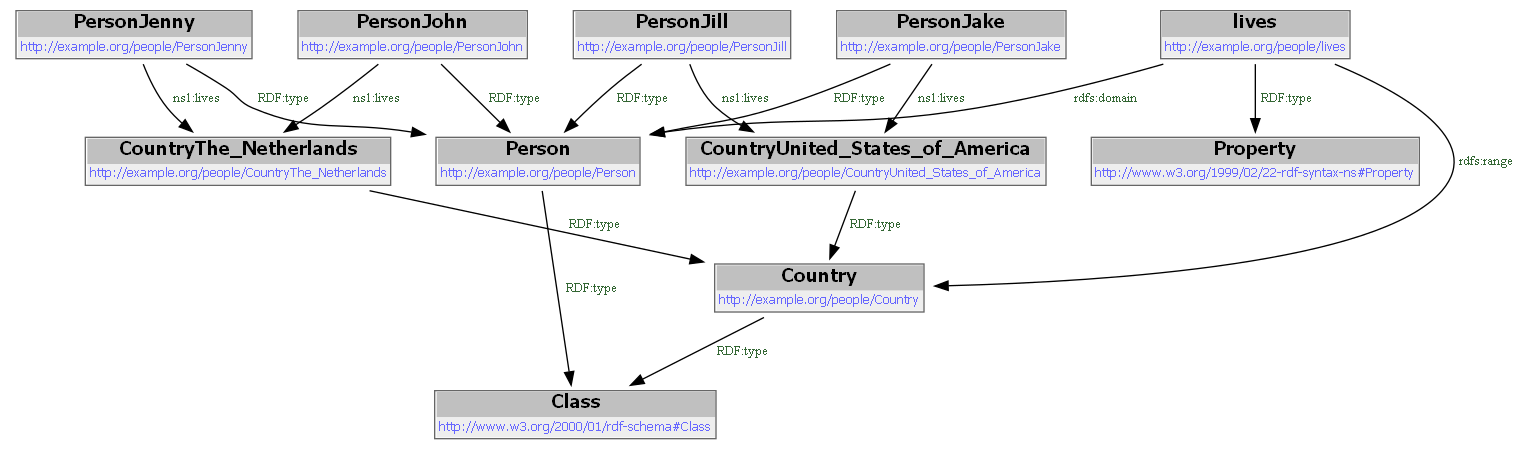

In [152]:
visualize(g)

In [109]:
for index, row in df.iterrows():
    g.add((URIRef('http://example.org/people/Address'+row['Address']),RDF.type,Address) )
    

http://example.org/people/AddressDam 52 does not look like a valid URI, trying to serialize this will break.
http://example.org/people/AddressLeidseplein 2 does not look like a valid URI, trying to serialize this will break.
http://example.org/people/Address52W Street 5 does not look like a valid URI, trying to serialize this will break.
http://example.org/people/Address12E Street 98 does not look like a valid URI, trying to serialize this will break.



(dot.exe:20004): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:20004): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:20004): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



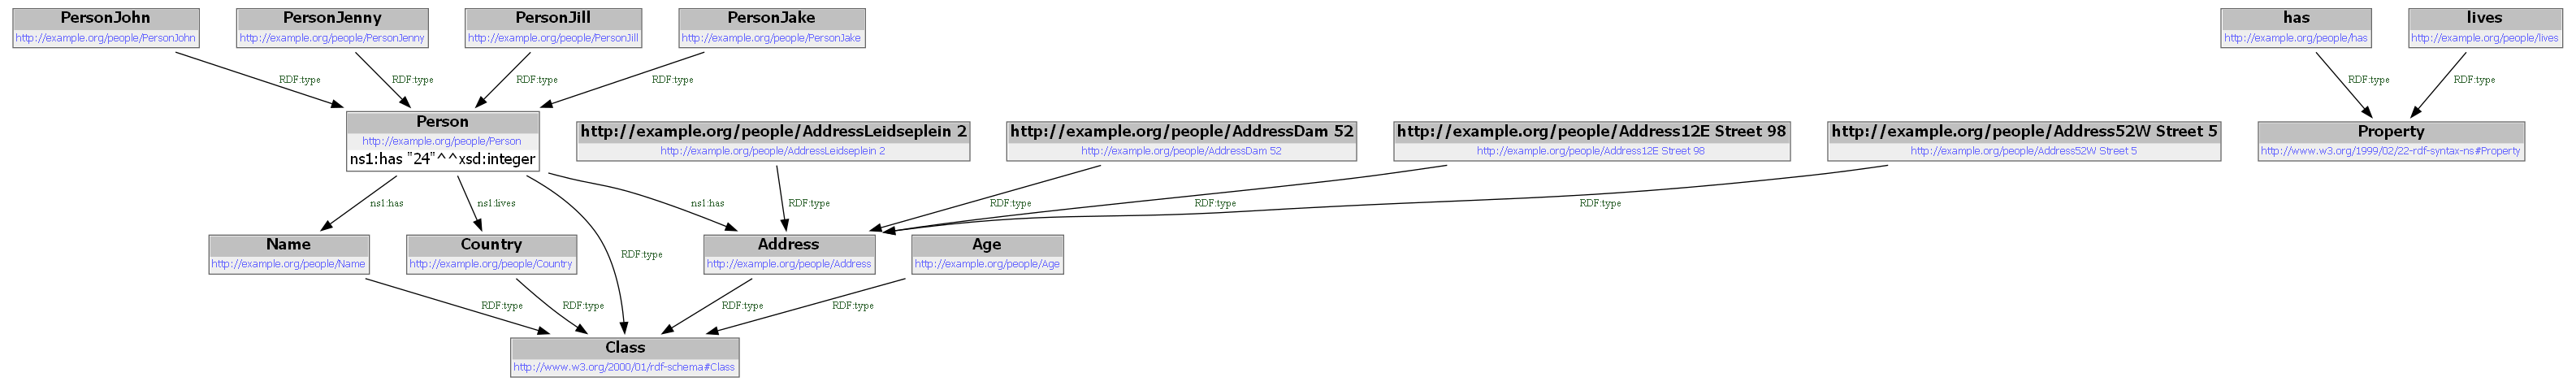

In [110]:
visualize(g)

In [ ]:
"Name";"Address";"Place";"Country";"Age";"Hobby";"Favourite Colour" 
"John";"Dam 52";"Amsterdam";"The Netherlands";"32";"Fishing";"Blue"
"Jenny";"Leidseplein 2";"Amsterdam";"The Netherlands";"12";"Dancing";"Mauve"
"Jill";"52W Street 5";"Amsterdam";"United States of America";"28";"Carpentry";"Cyan"
"Jake";"12E Street 98";"Amsterdam";"United States of America";"42";"Ballet";"Purple"